In [1]:
from google.colab import files
files.upload() #upload kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sizlingdhairya1/alzheimers-4
!unzip alzheimers-4.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/NonDemented/31 (10).jpg  
  inflating: Datasets/NonDemented/31 (100).jpg  
  inflating: Datasets/NonDemented/31 (11).jpg  
  inflating: Datasets/NonDemented/31 (12).jpg  
  inflating: Datasets/NonDemented/31 (13).jpg  
  inflating: Datasets/NonDemented/31 (14).jpg  
  inflating: Datasets/NonDemented/31 (15).jpg  
  inflating: Datasets/NonDemented/31 (16).jpg  
  inflating: Datasets/NonDemented/31 (17).jpg  
  inflating: Datasets/NonDemented/31 (18).jpg  
  inflating: Datasets/NonDemented/31 (19).jpg  
  inflating: Datasets/NonDemented/31 (2).jpg  
  inflating: Datasets/NonDemented/31 (20).jpg  
  inflating: Datasets/NonDemented/31 (21).jpg  
  inflating: Datasets/NonDemented/31 (22).jpg  
  inflating: Datasets/NonDemented/31 (23).jpg  
  inflating: Datasets/NonDemented/31 (24).jpg  
  inflating: Datasets/NonDemented/31 (25).jpg  
  inflating: Datasets/NonDemented/31 (26).jpg  
  inflating: Datasets/NonDemented/31 

Text(0.5, 1.0, 'VeryMildDemented=2240')

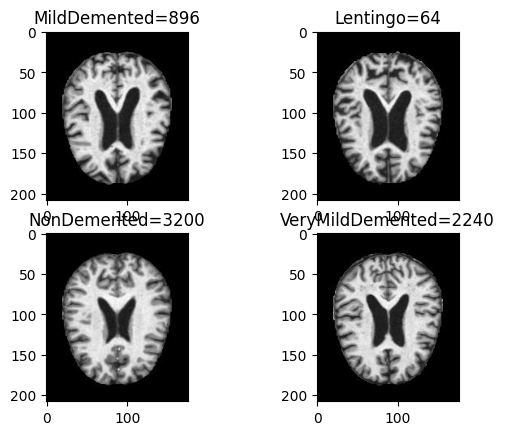

In [2]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import cv2
import os
import numpy as np
import shutil
SIZE=128
path='Datasets/'
clss=len(os.listdir(path))
k=1
data=[]
x=os.listdir(path)
labels=[]
aa=-1
k=-1
for filename in x:
    y=os.listdir(path+filename+'/')
    aa=aa+1
    k=k+1
    for file in y:
        img=cv2.imread(path+filename+'/'+file)
        img = cv2.resize(img, (SIZE, SIZE))
        data.append(img)
        labels.append(k)
        
data = np.array(data)
labels = np.array(labels) 
X_train, X_test, y_train, y_test1 = train_test_split(data, labels, test_size=0.20,random_state = 50) 

#Reshape input data 
X_train = X_train.reshape(X_train.shape[0], SIZE, SIZE, 3)
X_test = X_test.reshape(X_test.shape[0], SIZE, SIZE, 3)

#Normalize inputs from 0-255 to 0-1 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#One hot encoding of outputs
y_train = np_utils.to_categorical(y_train, clss)
y_test = np_utils.to_categorical(y_test1, clss)
num_classes = y_test.shape[1]
import cv2
import os
import matplotlib.pyplot as plt
img1=cv2.imread("/content/Datasets/MildDemented/26 (19).jpg")
img2=cv2.imread("/content/Datasets/ModerateDemented/27 (2).jpg")
img3=cv2.imread("/content/Datasets/NonDemented/26 (100).jpg")
img4=cv2.imread("/content/Datasets/VeryMildDemented/26 (44).jpg")
plt.figure()
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("MildDemented="+str(len(os.listdir("/content/Datasets/MildDemented/"))))
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Lentingo="+str(len(os.listdir("/content/Datasets/ModerateDemented/"))))
plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("NonDemented="+str(len(os.listdir("/content/Datasets/NonDemented/"))))
plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("VeryMildDemented="+str(len(os.listdir("/content/Datasets/VeryMildDemented/"))))

In [3]:
from keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, Activation
base_model = VGG16(input_shape=(SIZE,SIZE,3), 
                   include_top=False,
                   weights="imagenet")
# Freezing Layers
for layer in base_model.layers:
    layer.trainable=False
# Building Model
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(clss,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 4, 4, 512)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              16779264  
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             81

In [4]:
#Fit the model
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=20,batch_size=32,verbose=1)

Epoch 1/20
160/160 [==============================] - 29s 75ms/step - loss: 1.1798 - accuracy: 0.5621 - val_loss: 0.8639 - val_accuracy: 0.6062
Epoch 2/20
160/160 [==============================] - 10s 64ms/step - loss: 0.8669 - accuracy: 0.6428 - val_loss: 0.7468 - val_accuracy: 0.6492
Epoch 3/20
160/160 [==============================] - 10s 65ms/step - loss: 0.7107 - accuracy: 0.6996 - val_loss: 0.6447 - val_accuracy: 0.7305
Epoch 4/20
160/160 [==============================] - 10s 65ms/step - loss: 0.6451 - accuracy: 0.7260 - val_loss: 0.4532 - val_accuracy: 0.8344
Epoch 5/20
160/160 [==============================] - 11s 71ms/step - loss: 0.5829 - accuracy: 0.7533 - val_loss: 0.4333 - val_accuracy: 0.8258
Epoch 6/20
160/160 [==============================] - 11s 66ms/step - loss: 0.5306 - accuracy: 0.7686 - val_loss: 0.4082 - val_accuracy: 0.8375
Epoch 7/20
160/160 [==============================] - 11s 71ms/step - loss: 0.4939 - accuracy: 0.7945 - val_loss: 0.3465 - val_accuracy:

In [5]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test1, y_pred))
print('Classification Report')
print(classification_report(y_test1, y_pred,target_names=os.listdir(path)))

40/40 [==============================] - 2s 42ms/step
Confusion Matrix
[[407  31   2   0]
 [ 17 614   4   0]
 [  3   8 181   0]
 [  0   1   0  12]]
Classification Report
                  precision    recall  f1-score   support

VeryMildDemented       0.95      0.93      0.94       440
     NonDemented       0.94      0.97      0.95       635
    MildDemented       0.97      0.94      0.96       192
ModerateDemented       1.00      0.92      0.96        13

        accuracy                           0.95      1280
       macro avg       0.96      0.94      0.95      1280
    weighted avg       0.95      0.95      0.95      1280



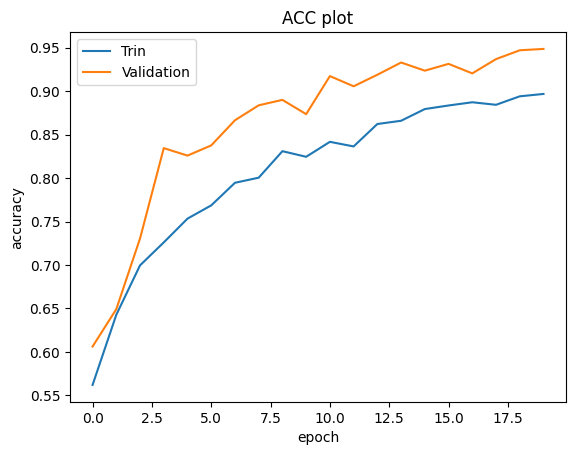

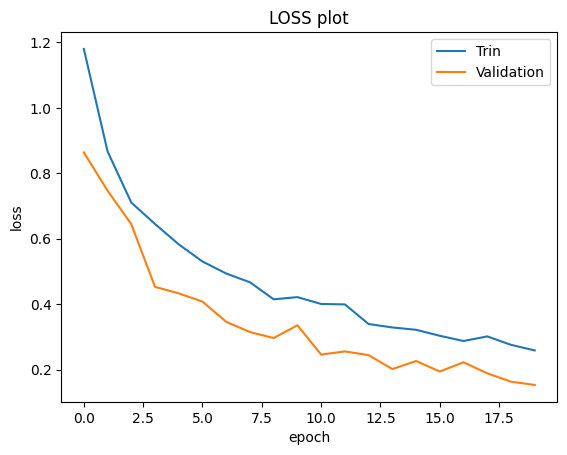

In [6]:
import matplotlib.pyplot as plt
# Plot accuracy result
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACC plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Trin','Validation'])
plt.show()
# Plot loss result
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Trin','Validation'])
plt.show()

1/1 [==============================] - 1s 696ms/step


Text(0.5, 1.0, 'Prediction: ModerateDemented')

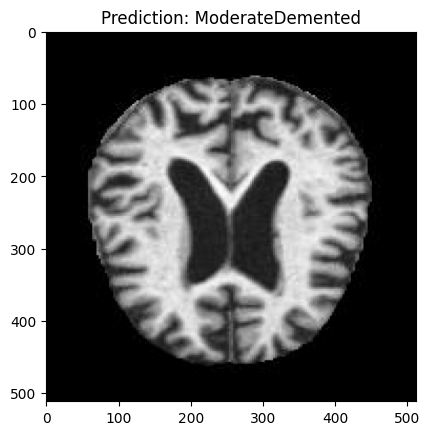

In [7]:
import  numpy as np
import cv2
path1="/content/Datasets/ModerateDemented/28 (2).jpg"
categories = os.listdir(path)
nimage = cv2.imread(path1)
image = cv2.resize(nimage,(SIZE,SIZE))
image = image/255.0
prediction = model.predict(np.array(image).reshape(-1,SIZE,SIZE,3))
pclass = np.argmax(prediction)
img=cv2.imread(path1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(512,512), interpolation = cv2.INTER_AREA)
import matplotlib.pyplot as plt
plt.imshow(img)
pValue = "Prediction: {0}".format(categories[int(pclass)])
plt.title(pValue)